# load-and-edit-points.ipynb

This notebook is used to load a CSV containing coordinates of points (slice, row, column) and add them to napari as a Points layer. This will allow the points to be edited and saved again to a CSV file.

## Import packages

In [2]:
# Third-party imports
import napari
import numpy as np
import pandas as pd
# Local imports
import helpers

## Open napari viewer window

In [3]:
viewer = napari.Viewer()

## Load images

11 image(s) loaded.
Image numbers: [220 221 222 223 224 225 226 227 228 229 230]


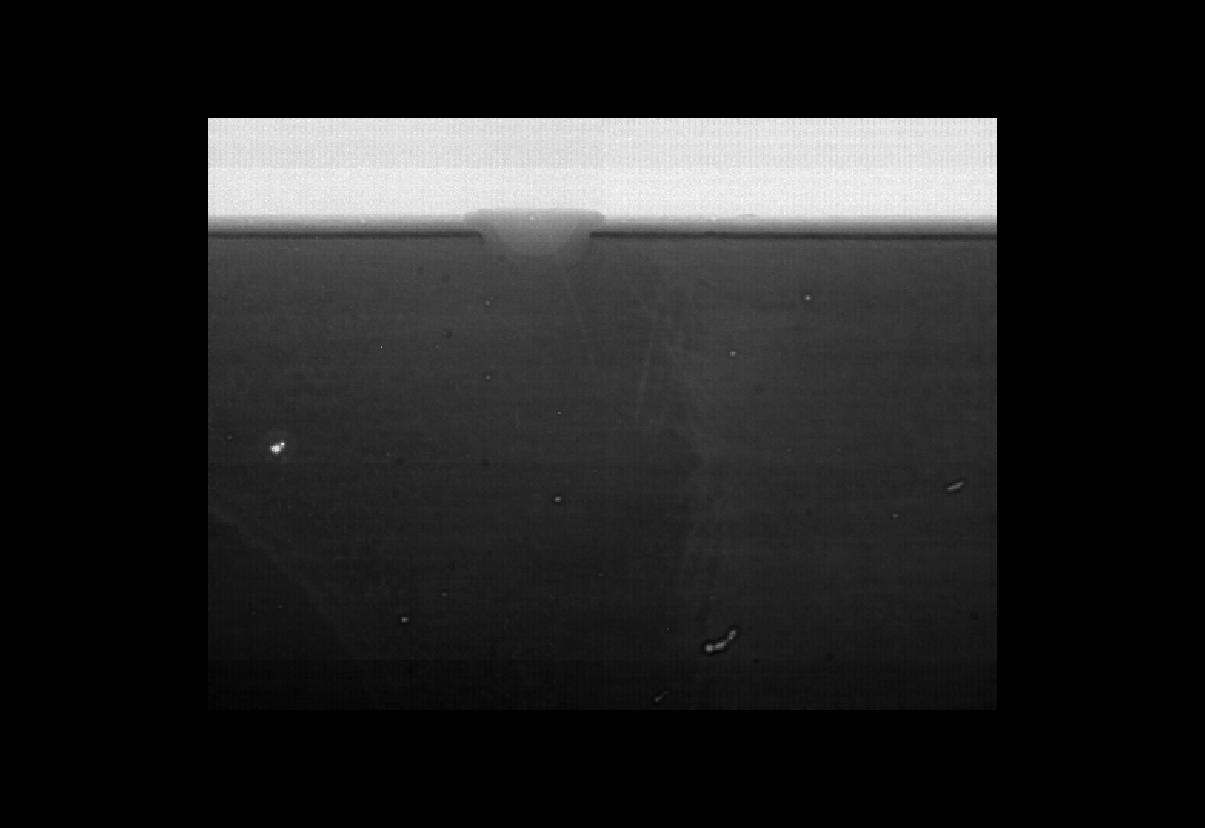

In [4]:
img_nums, imgs = helpers.load_images('data', manual_img_nums=np.arange(220, 231))
print(f'{len(imgs)} image(s) loaded.')
print(f'Image numbers: {img_nums}')
viewer.add_image(imgs)
napari.utils.nbscreenshot(viewer, canvas_only=True)

## Process images

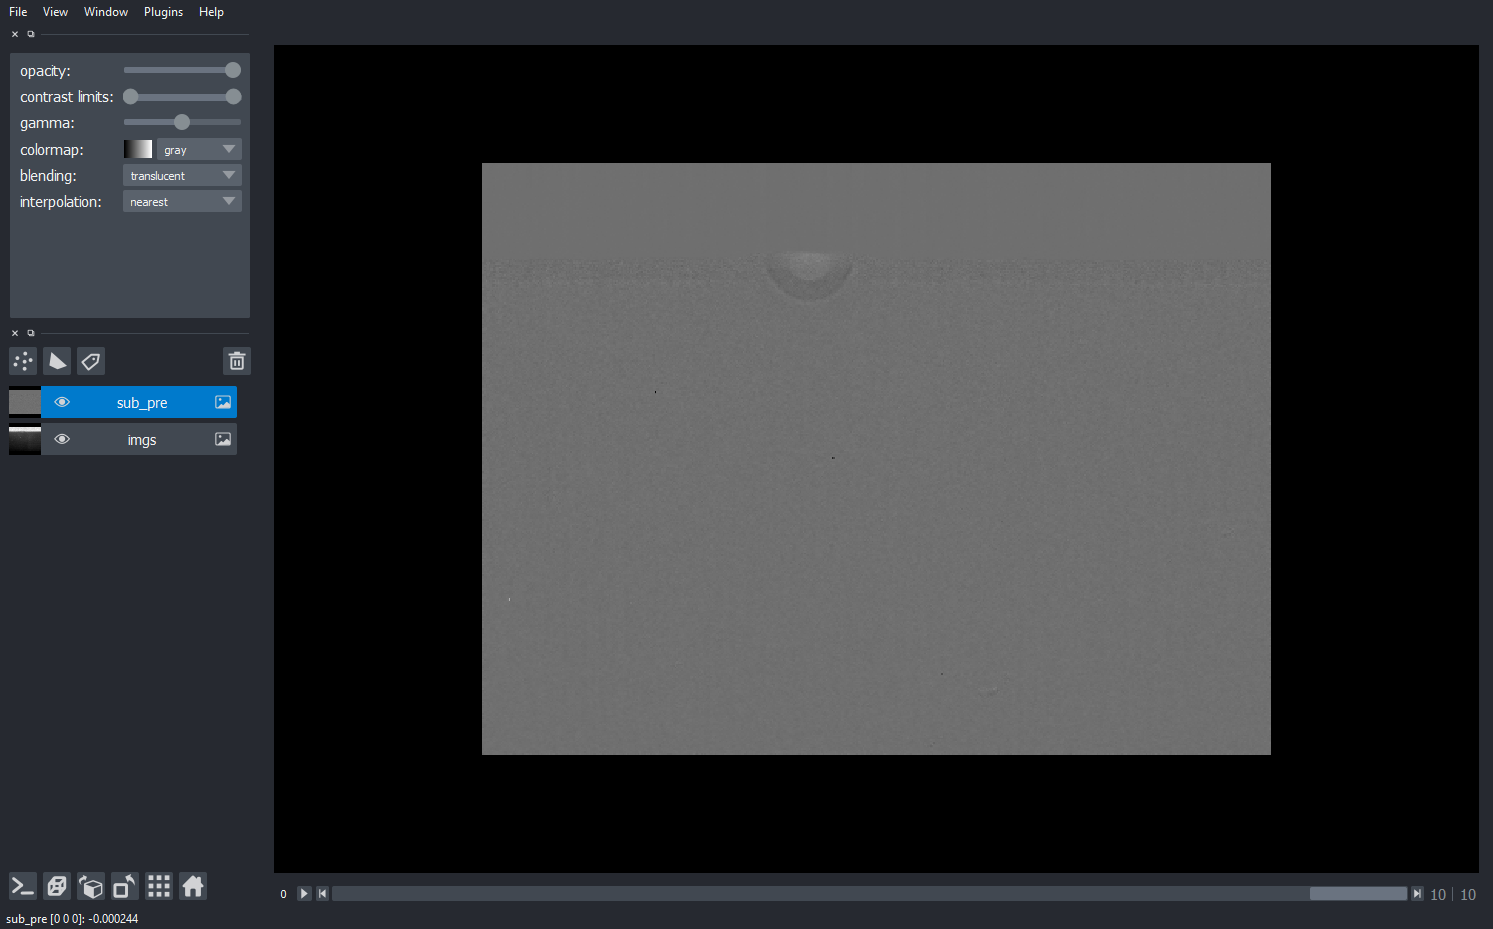

In [6]:
sub_pre = helpers.process_images(imgs, process='sub_first')
viewer.add_image(sub_pre)
napari.utils.nbscreenshot(viewer, canvas_only=False)

## Load CSV as Points layer

In [11]:
pts_name, pts_data = helpers.load_points('example-points.csv')
viewer.add_points(
    pts_data,
    ndim=3,
    size=2,
    name=pts_name
)

<Points layer 'example-points' at 0x2405dbd6700>

## Save edited Points layer as CSV

In [13]:
helpers.save_points(viewer, pts_name, csv_name='example-points-1')

CSV saved: C:\Users\gusb\Research\manual-feature-tracking\example-points-1.csv
